### Trend Analysis

In [15]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt    
import warnings

warnings.filterwarnings("ignore")

In [16]:
# Load and Read the cleaned retail sales data

df = pd.read_csv(r"C:\Users\kiyo3001\Desktop\Personal\Python\csv\cleaned_retail_store_sales.csv")
df.head()

,Unnamed: 0,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,year,month
0,0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,True,2024,4
1,1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,True,2023,7
2,2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,False,2022,10
3,3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,True,2022,5
4,4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,False,2022,10


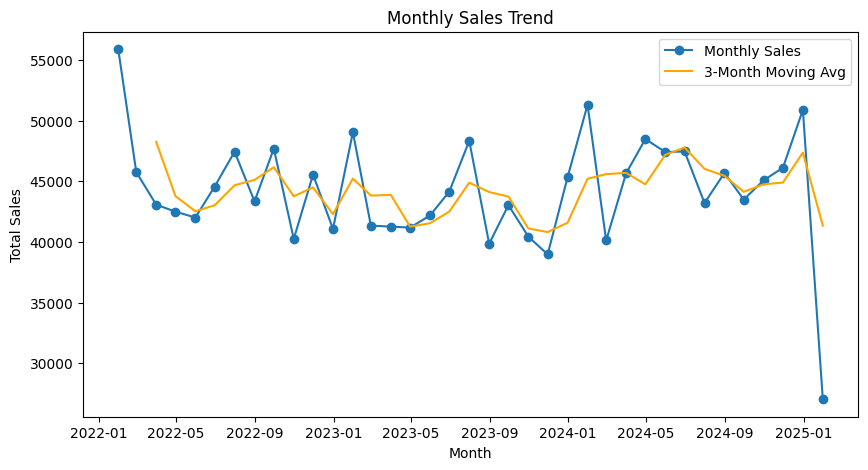

In [17]:
# 1) Monthly Sales Trend with Moving Average

# Convert 'transaction_date' to datetime format
df['transaction_date']= pd.to_datetime(df['transaction_date'])

# Calculate Monthly Sales Trend

monthly_sales = df.groupby(pd.Grouper(key='transaction_date', freq='M'))['total_spent'].sum().reset_index()
monthly_sales['moving_avg'] = monthly_sales['total_spent'].rolling(window=3).mean()

# Plot Monthly Sales Trend with Moving Average

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['transaction_date'], monthly_sales['total_spent'], marker='o', label='Monthly Sales')
plt.plot(monthly_sales['transaction_date'], monthly_sales['moving_avg'], color='orange', label='3-Month Moving Avg')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


   year  total_spent
0  2022     539138.5
1  2023     515121.5
2  2024     554902.0
3  2025      27033.5


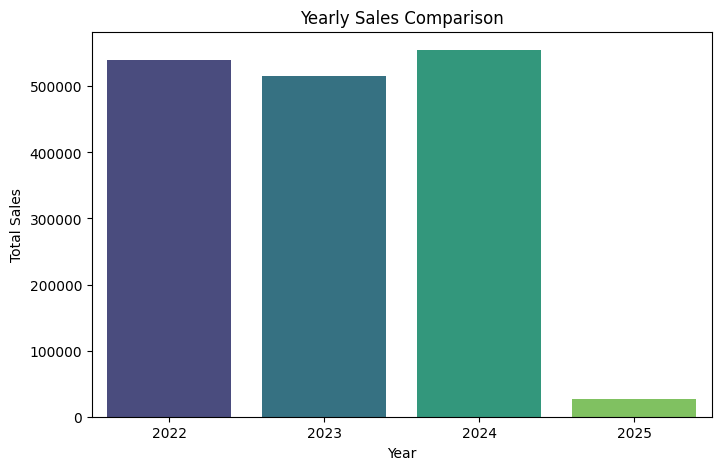

In [18]:
# 2) Yearly Sales Comparison

# calculate Yearly Sales
yearly_sales = df.groupby('year')['total_spent'].sum().reset_index()
print(yearly_sales)

# Plot Yearly Sales Comparison
plt.figure(figsize=(8,5))
sns.barplot(data= yearly_sales, x= 'year', y='total_spent', palette='viridis')
plt.title('Yearly Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

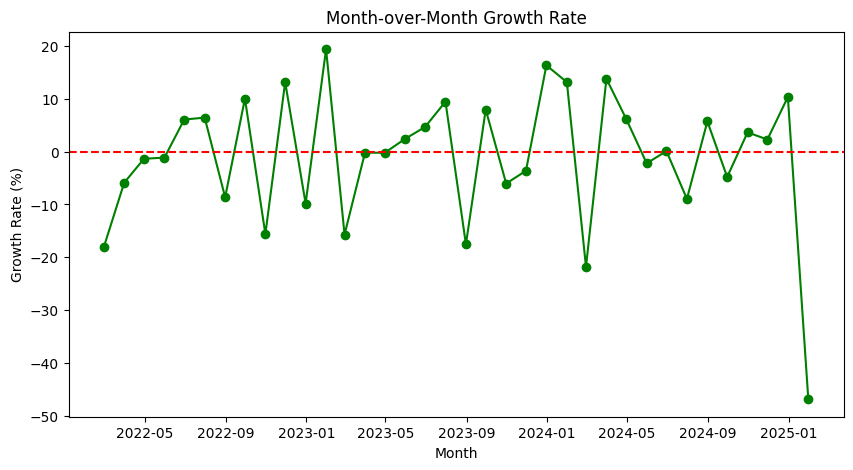

In [19]:
# 3) Month-over-Month Growth Rate

# Calculate Month-over-Month Growth Rate
monthly_sales['MoM_growth'] = monthly_sales['total_spent'].pct_change() * 100

# Plot Month-over-Month Growth Rate
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['transaction_date'], monthly_sales['MoM_growth'], marker='o', color='green')
plt.title('Month-over-Month Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')
plt.show()


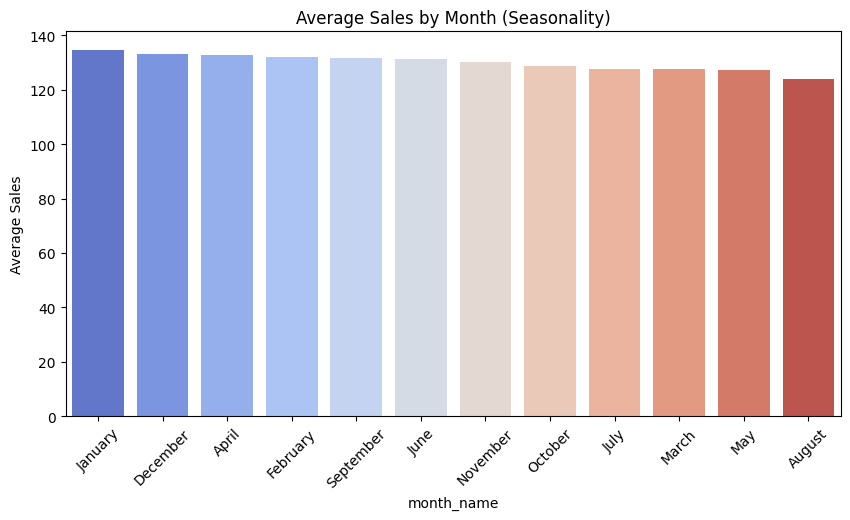

In [20]:
# 4) Seasonal Sales Patterns

# Extract month from 'transaction_date'
df['month_name'] = df['transaction_date'].dt.month_name()
# Calculate Average Sales by Month
seasonal = df.groupby('month_name')['total_spent'].mean().sort_values(ascending=False)

# Plot Seasonal Sales Patterns
plt.figure(figsize=(10,5))
sns.barplot(x=seasonal.index, y=seasonal.values, palette='coolwarm')
plt.title('Average Sales by Month (Seasonality)')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.show()

